# Thumb movement analysis

As a step up from [neuro-breakout](https://github.com/PerlinWarp/Neuro-Breakout) and trying to use the leap motion, 30 seconds of data has been gathered using the hand. 

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Thumb data was gathered on April 7th, at 16:30 using [this](https://github.com/PerlinWarp/NeuroLeap/commit/09cba969eb64a9da1b9b925f458650e208ae997f) commit.

Important parts of this commit was that data was gathered using:
```
m = MyoRaw(raw=False, filtered=True) # 50Hz Filtered Myo data

	def get_points():
		frame = controller.frame()
		hand = frame.hands.rightmost
		if not hand.is_valid: return None
		fingers = hand.fingers

		X = []
		Y = []
		Z = []

		# Add the position of the palms
		X.append(-1 *hand.palm_position.x)
		Y.append(hand.palm_position.y)
		Z.append(hand.palm_position.z)

		for finger in fingers:
			# Add finger tip positions
			X.append(-1 * finger.stabilized_tip_position.x)
			Y.append(finger.stabilized_tip_position.y)
			Z.append(finger.stabilized_tip_position.z) 
		return np.array([X, Z, Y])

```

Note the **stabilized tip positions** from the [documentation](https://developer-archive.leapmotion.com/documentation/python/api/Leap.Pointable.html#Leap.Pointable.stabilized_tip_position):
  
Smoothing and stabilization is performed in order to make this value more suitable for interaction with 2D content. The stabilized position lags behind the tip position by a variable amount, depending primarily on the speed of movement.


In [10]:
data = pd.read_csv("thumb_dataset_30.csv")

In [11]:
data.head()

,Channel_1,Channel_2,Channel_3,Channel_4,Channel_5,Channel_6,Channel_7,Channel_8,Palm_tip_x,Thumb_tip_x,...,Index_tip_y,Middle_tip_y,Ring_tip_y,Pinky_tip_y,Palm_tip_z,Thumb_tip_z,Index_tip_z,Middle_tip_z,Ring_tip_z,Pinky_tip_z
0,31,140,140,83,42,30,22,21,-18.167004,27.724434,...,-73.758804,-89.471649,-79.439949,-71.918144,144.981094,120.059906,133.536011,124.068176,119.804108,109.158684
1,30,154,193,89,53,31,21,21,-18.131498,27.894018,...,-73.705612,-89.391991,-79.372650,-71.772514,144.968231,120.200348,133.561554,124.106369,119.839752,109.234200
2,31,159,193,89,57,33,27,28,-18.109987,28.061665,...,-73.654808,-89.311295,-79.303879,-71.628952,144.953217,120.337166,133.585297,124.143944,119.874626,109.307076
3,33,152,177,96,58,34,27,30,-18.092686,28.231144,...,-73.604759,-89.231735,-79.234291,-71.495186,144.924377,120.473526,133.607986,124.180008,119.908142,109.373688
4,30,134,182,88,56,34,29,30,-18.089689,28.402817,...,-73.555382,-89.153038,-79.166466,-71.375092,144.883591,120.609833,133.629761,124.214531,119.939423,109.432350


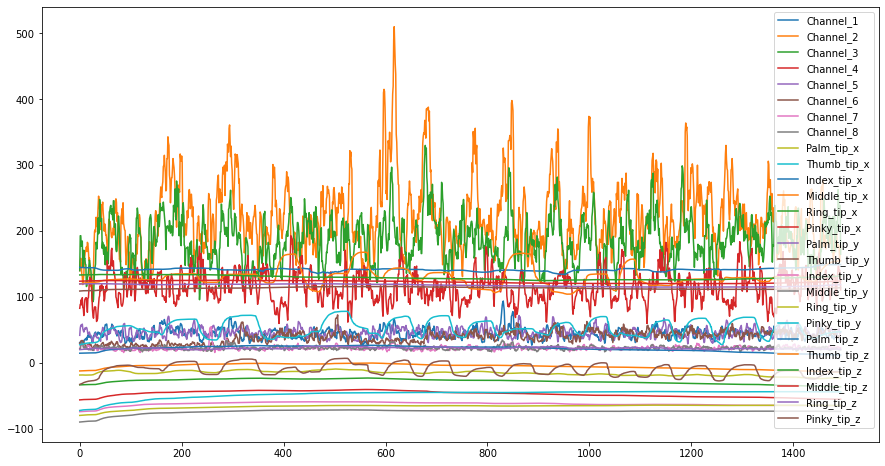

In [12]:
import matplotlib

matplotlib.rc('figure', figsize=(15, 8))

data.plot()

In [13]:
data.columns

Index(['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5',
       'Channel_6', 'Channel_7', 'Channel_8', 'Palm_tip_x', 'Thumb_tip_x',
       'Index_tip_x', 'Middle_tip_x', 'Ring_tip_x', 'Pinky_tip_x',
       'Palm_tip_y', 'Thumb_tip_y', 'Index_tip_y', 'Middle_tip_y',
       'Ring_tip_y', 'Pinky_tip_y', 'Palm_tip_z', 'Thumb_tip_z', 'Index_tip_z',
       'Middle_tip_z', 'Ring_tip_z', 'Pinky_tip_z'],
      dtype='object')

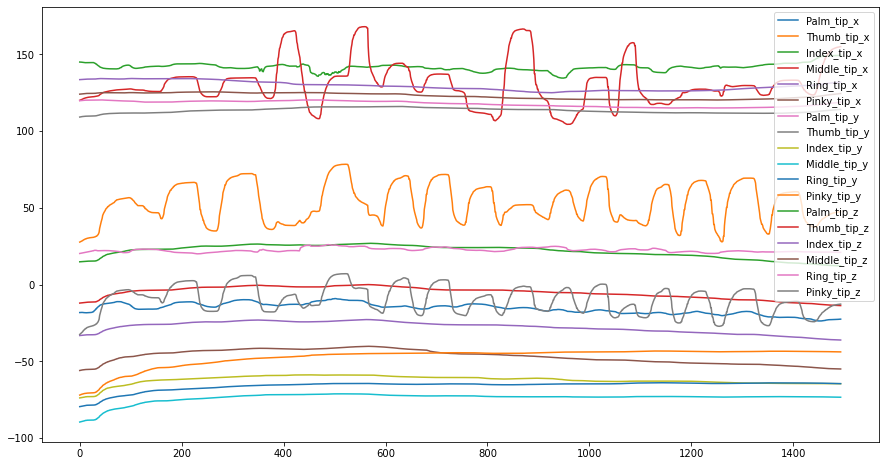

In [14]:
# Just considering the position data
pos_cols = ['Palm_tip_x', 'Thumb_tip_x',
       'Index_tip_x', 'Middle_tip_x', 'Ring_tip_x', 'Pinky_tip_x',
       'Palm_tip_y', 'Thumb_tip_y', 'Index_tip_y', 'Middle_tip_y',
       'Ring_tip_y', 'Pinky_tip_y', 'Palm_tip_z', 'Thumb_tip_z', 'Index_tip_z',
       'Middle_tip_z', 'Ring_tip_z', 'Pinky_tip_z']

df = data[pos_cols]
df.plot()

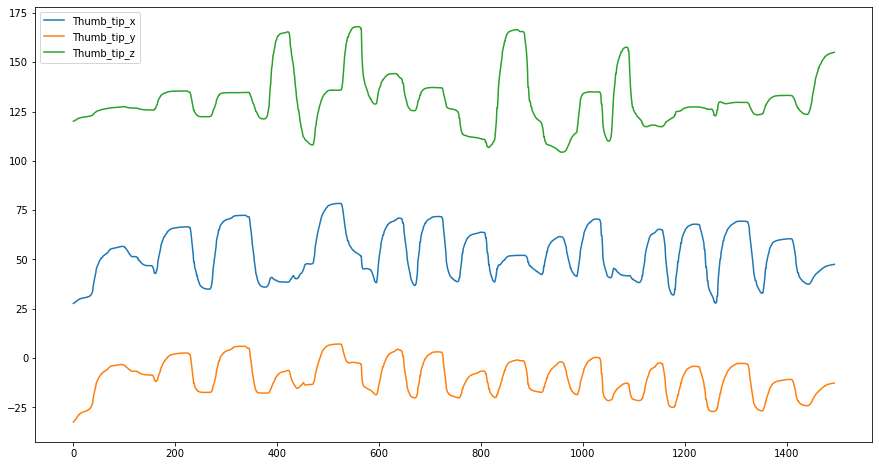

In [17]:
# Just considering the thumb
cols = ['Thumb_tip_x', 'Thumb_tip_y', 'Thumb_tip_z']
df = data[cols]
df.plot()

In [18]:
data.var()

Channel_1         61.155101
Channel_2       2981.336682
Channel_3       1252.896925
Channel_4        504.741145
Channel_5         47.501323
Channel_6         76.654646
Channel_7         10.194760
Channel_8          6.626612
Palm_tip_x        12.398094
Thumb_tip_x      155.309039
Index_tip_x       16.549957
Middle_tip_x      14.101624
Ring_tip_x        13.377871
Pinky_tip_x       19.356980
Palm_tip_y         1.829982
Thumb_tip_y       80.012689
Index_tip_y        7.472674
Middle_tip_y      10.030366
Ring_tip_y         9.116989
Pinky_tip_y       36.370002
Palm_tip_z         5.673768
Thumb_tip_z      197.256755
Index_tip_z        8.645685
Middle_tip_z       3.685747
Ring_tip_z         3.382069
Pinky_tip_z        2.506600
dtype: float64

By looking at the variance, we can make sure we didn't move the arm around too much.

In [19]:
data.columns

Index(['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5',
       'Channel_6', 'Channel_7', 'Channel_8', 'Palm_tip_x', 'Thumb_tip_x',
       'Index_tip_x', 'Middle_tip_x', 'Ring_tip_x', 'Pinky_tip_x',
       'Palm_tip_y', 'Thumb_tip_y', 'Index_tip_y', 'Middle_tip_y',
       'Ring_tip_y', 'Pinky_tip_y', 'Palm_tip_z', 'Thumb_tip_z', 'Index_tip_z',
       'Middle_tip_z', 'Ring_tip_z', 'Pinky_tip_z'],
      dtype='object')

From now on, I will only use sEMG, thumb and palm data. The palm data is to use as a reference. 

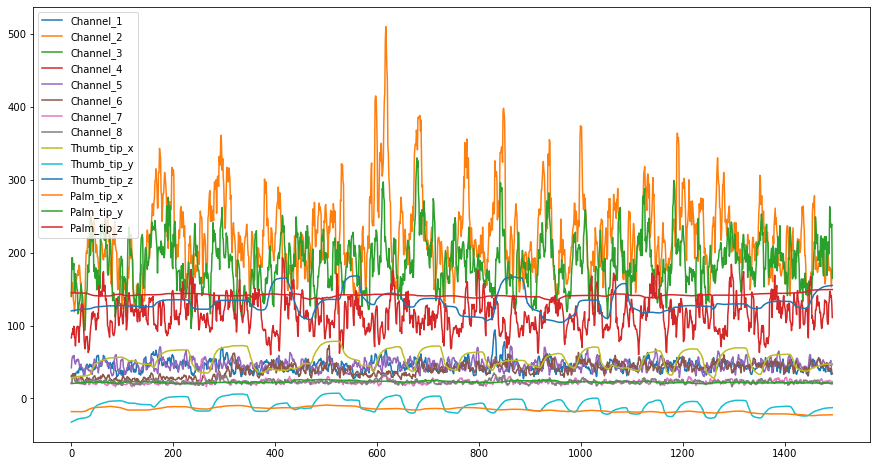

In [21]:
# Just considering the data we care about
cols = ['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5',
       'Channel_6', 'Channel_7', 'Channel_8','Thumb_tip_x', 'Thumb_tip_y', 'Thumb_tip_z', 
       'Palm_tip_x', 'Palm_tip_y', 'Palm_tip_z']
df = data[cols]
df.plot()

[Text(0.5, 1.0, 'sEMG and Leap corrolations')]

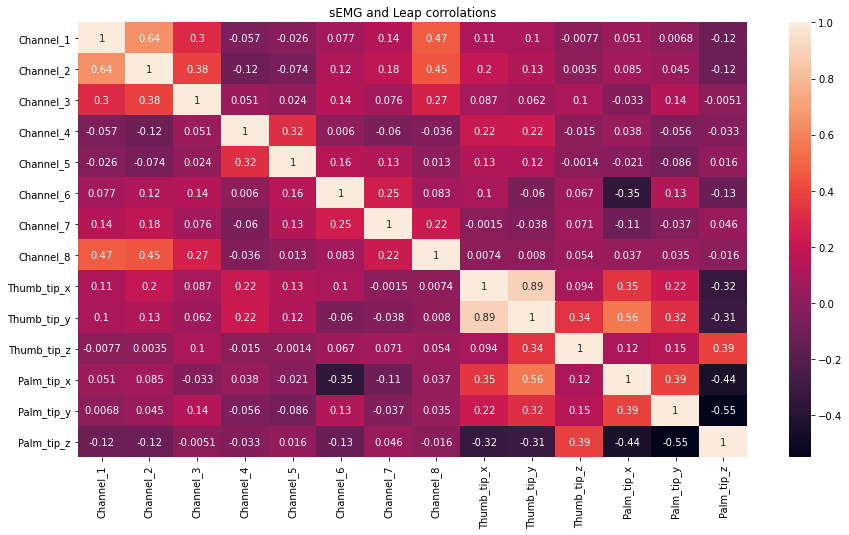

In [26]:
sns.heatmap(df.corr(), annot=True).set(title="sEMG and Leap corrolations")

# Feature engineering: relative positions

In [27]:
df.columns

Index(['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4', 'Channel_5',
       'Channel_6', 'Channel_7', 'Channel_8', 'Thumb_tip_x', 'Thumb_tip_y',
       'Thumb_tip_z', 'Palm_tip_x', 'Palm_tip_y', 'Palm_tip_z'],
      dtype='object')

<ipython-input-31-69a715ef4de4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rel["Thumb_r_tip_x"] = df_rel["Thumb_tip_x"] - df_rel['Palm_tip_x']
<ipython-input-31-69a715ef4de4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rel["Thumb_r_tip_y"] = df_rel["Thumb_tip_y"] - df_rel['Palm_tip_y']
<ipython-input-31-69a715ef4de4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

[Text(0.5, 1.0, 'sEMG and Leap rel corrolations')]

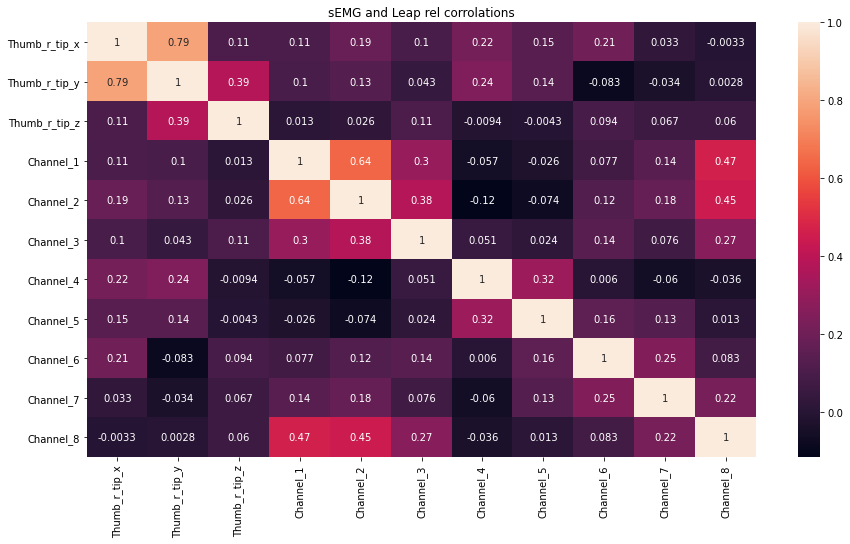

In [31]:
df_rel = df
df_rel["Thumb_r_tip_x"] = df_rel["Thumb_tip_x"] - df_rel['Palm_tip_x']
df_rel["Thumb_r_tip_y"] = df_rel["Thumb_tip_y"] - df_rel['Palm_tip_y']
df_rel["Thumb_r_tip_z"] = df_rel["Thumb_tip_z"] - df_rel['Palm_tip_z']

df_rel = df_rel[['Thumb_r_tip_x', 'Thumb_r_tip_y','Thumb_r_tip_z',
                 'Channel_1', 'Channel_2', 'Channel_3', 'Channel_4',
                 'Channel_5', 'Channel_6', 'Channel_7', 'Channel_8']]

sns.heatmap(df_rel.corr(), annot=True).set(title="sEMG and Leap rel corrolations")

[Text(0.5, 1.0, 'sEMG and Leap rel corrolations')]

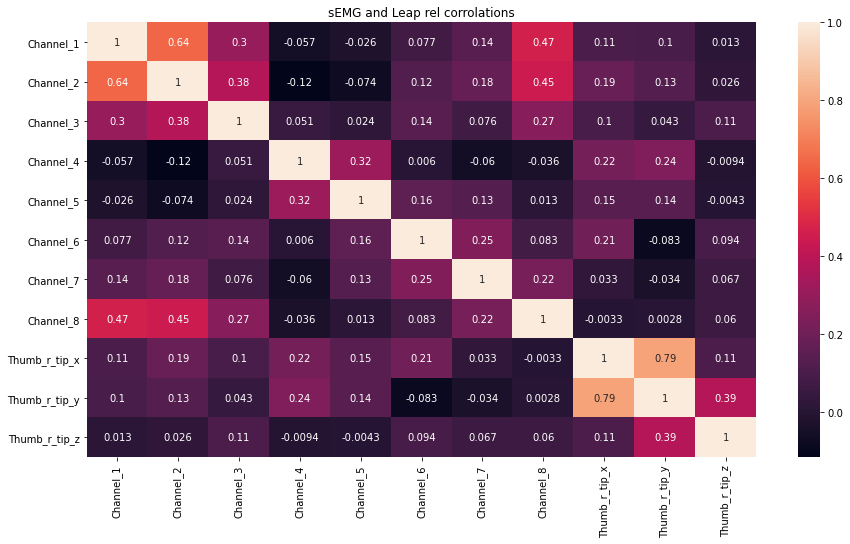

In [32]:
df_rel = df_rel[['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4',
                 'Channel_5', 'Channel_6', 'Channel_7', 'Channel_8', 
                 'Thumb_r_tip_x', 'Thumb_r_tip_y','Thumb_r_tip_z']]

sns.heatmap(df_rel.corr(), annot=True).set(title="sEMG and Leap rel corrolations")

# Making some baseline ML

## Train Test Split

In [34]:
from sklearn.model_selection import train_test_split

In [46]:
y_cols = ['Thumb_tip_x', 'Thumb_tip_y','Thumb_tip_z']
x_cols = ['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4',
          'Channel_5', 'Channel_6', 'Channel_7', 'Channel_8']

y = df['Thumb_tip_x']
X = df[x_cols]
train_X, test_X, train_y, test_y = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.25)

In [48]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(train_X, train_y, verbose=False)

predictions = my_model.predict(test_X)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error X: " + str(mean_absolute_error(predictions, test_y)))

Mean Absolute Error X: 8.848801944345077


In [49]:
y_cols = ['Thumb_tip_x', 'Thumb_tip_y','Thumb_tip_z']
x_cols = ['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4',
          'Channel_5', 'Channel_6', 'Channel_7', 'Channel_8']

y = df['Thumb_tip_y']
X = df[x_cols]
train_X, test_X, train_y, test_y = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.25)

my_model = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(train_X, train_y, verbose=False)

predictions = my_model.predict(test_X)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error Y: " + str(mean_absolute_error(predictions, test_y)))

Mean Absolute Error Y: 6.537690188825369


In [51]:
y_cols = ['Thumb_tip_x', 'Thumb_tip_y','Thumb_tip_z']
x_cols = ['Channel_1', 'Channel_2', 'Channel_3', 'Channel_4',
          'Channel_5', 'Channel_6', 'Channel_7', 'Channel_8']

y = df['Thumb_tip_z']
X = df[x_cols]
train_X, test_X, train_y, test_y = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.25)

my_model = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(train_X, train_y, verbose=False)

predictions = my_model.predict(test_X)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error Z: " + str(mean_absolute_error(predictions, test_y)))

Mean Absolute Error Z: 9.935852417971361


# Multivariate regression

In [52]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [53]:
y = df[y_cols]
X = df[x_cols]
train_X, test_X, train_y, test_y = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.25)

In [55]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(8, kernel_initializer='normal',input_dim = train_X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(3, kernel_initializer='normal',activation='sigmoid'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2304      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 771       
Total params: 68,939
Trainable params: 68,939
Non-trainable params: 0
_________________________________________________________________


In [57]:
history = NN_model.fit(train_X, train_y, epochs=500, batch_size=32, validation_split = 0.2)

Epoch 1/500
28/28 [==============================] - 0s 4ms/step - loss: 50.8602 - mean_absolute_error: 50.8602 - val_loss: 25.3379 - val_mean_absolute_error: 25.3379
Epoch 2/500
28/28 [==============================] - 0s 2ms/step - loss: 15.2298 - mean_absolute_error: 15.2298 - val_loss: 11.4800 - val_mean_absolute_error: 11.4800
Epoch 3/500
28/28 [==============================] - 0s 2ms/step - loss: 11.7608 - mean_absolute_error: 11.7608 - val_loss: 10.8439 - val_mean_absolute_error: 10.8439
Epoch 4/500
28/28 [==============================] - 0s 2ms/step - loss: 11.4360 - mean_absolute_error: 11.4360 - val_loss: 11.0127 - val_mean_absolute_error: 11.0127
Epoch 5/500
28/28 [==============================] - 0s 2ms/step - loss: 11.3358 - mean_absolute_error: 11.3358 - val_loss: 11.8520 - val_mean_absolute_error: 11.8520
Epoch 6/500
28/28 [==============================] - 0s 2ms/step - loss: 11.2107 - mean_absolute_error: 11.2107 - val_loss: 11.1704 - val_mean_absolute_error: 11.170

28/28 [==============================] - 0s 2ms/step - loss: 10.1406 - mean_absolute_error: 10.1406 - val_loss: 9.5188 - val_mean_absolute_error: 9.5188
Epoch 51/500
28/28 [==============================] - 0s 2ms/step - loss: 10.1606 - mean_absolute_error: 10.1606 - val_loss: 9.8165 - val_mean_absolute_error: 9.8165
Epoch 52/500
28/28 [==============================] - 0s 2ms/step - loss: 10.0135 - mean_absolute_error: 10.0135 - val_loss: 10.0960 - val_mean_absolute_error: 10.0960
Epoch 53/500
28/28 [==============================] - 0s 2ms/step - loss: 10.1239 - mean_absolute_error: 10.1239 - val_loss: 9.8895 - val_mean_absolute_error: 9.8895
Epoch 54/500
28/28 [==============================] - 0s 2ms/step - loss: 9.9395 - mean_absolute_error: 9.9395 - val_loss: 9.8827 - val_mean_absolute_error: 9.8827
Epoch 55/500
28/28 [==============================] - 0s 2ms/step - loss: 10.0003 - mean_absolute_error: 10.0003 - val_loss: 9.4261 - val_mean_absolute_error: 9.4261
Epoch 56/500
28/2

Epoch 100/500
28/28 [==============================] - 0s 2ms/step - loss: 9.7081 - mean_absolute_error: 9.7081 - val_loss: 9.4051 - val_mean_absolute_error: 9.4051
Epoch 101/500
28/28 [==============================] - 0s 2ms/step - loss: 9.5577 - mean_absolute_error: 9.5577 - val_loss: 9.3432 - val_mean_absolute_error: 9.3432
Epoch 102/500
28/28 [==============================] - 0s 2ms/step - loss: 9.5175 - mean_absolute_error: 9.5175 - val_loss: 9.2053 - val_mean_absolute_error: 9.2053
Epoch 103/500
28/28 [==============================] - 0s 2ms/step - loss: 9.3909 - mean_absolute_error: 9.3909 - val_loss: 9.1494 - val_mean_absolute_error: 9.1494
Epoch 104/500
28/28 [==============================] - 0s 2ms/step - loss: 9.3941 - mean_absolute_error: 9.3941 - val_loss: 9.0720 - val_mean_absolute_error: 9.0720
Epoch 105/500
28/28 [==============================] - 0s 2ms/step - loss: 9.4484 - mean_absolute_error: 9.4484 - val_loss: 9.2828 - val_mean_absolute_error: 9.2828
Epoch 106/

Epoch 150/500
28/28 [==============================] - 0s 2ms/step - loss: 9.1156 - mean_absolute_error: 9.1156 - val_loss: 8.9143 - val_mean_absolute_error: 8.9143
Epoch 151/500
28/28 [==============================] - 0s 2ms/step - loss: 9.1571 - mean_absolute_error: 9.1571 - val_loss: 8.7737 - val_mean_absolute_error: 8.7737
Epoch 152/500
28/28 [==============================] - 0s 2ms/step - loss: 9.0614 - mean_absolute_error: 9.0614 - val_loss: 8.8784 - val_mean_absolute_error: 8.8784
Epoch 153/500
28/28 [==============================] - 0s 2ms/step - loss: 9.0424 - mean_absolute_error: 9.0424 - val_loss: 8.7745 - val_mean_absolute_error: 8.7745
Epoch 154/500
28/28 [==============================] - 0s 2ms/step - loss: 9.0500 - mean_absolute_error: 9.0500 - val_loss: 8.7913 - val_mean_absolute_error: 8.7913
Epoch 155/500
28/28 [==============================] - 0s 2ms/step - loss: 9.1190 - mean_absolute_error: 9.1190 - val_loss: 8.7415 - val_mean_absolute_error: 8.7415
Epoch 156/

28/28 [==============================] - 0s 2ms/step - loss: 9.1682 - mean_absolute_error: 9.1682 - val_loss: 8.7715 - val_mean_absolute_error: 8.7715
Epoch 200/500
28/28 [==============================] - 0s 2ms/step - loss: 9.0610 - mean_absolute_error: 9.0610 - val_loss: 8.9575 - val_mean_absolute_error: 8.9575
Epoch 201/500
28/28 [==============================] - 0s 2ms/step - loss: 9.0691 - mean_absolute_error: 9.0691 - val_loss: 8.8756 - val_mean_absolute_error: 8.8756
Epoch 202/500
28/28 [==============================] - 0s 2ms/step - loss: 9.0343 - mean_absolute_error: 9.0343 - val_loss: 8.7292 - val_mean_absolute_error: 8.7292
Epoch 203/500
28/28 [==============================] - 0s 2ms/step - loss: 9.0925 - mean_absolute_error: 9.0925 - val_loss: 8.8505 - val_mean_absolute_error: 8.8505
Epoch 204/500
28/28 [==============================] - 0s 2ms/step - loss: 9.0850 - mean_absolute_error: 9.0850 - val_loss: 8.8365 - val_mean_absolute_error: 8.8365
Epoch 205/500
28/28 [===

Epoch 249/500
28/28 [==============================] - 0s 2ms/step - loss: 8.9779 - mean_absolute_error: 8.9779 - val_loss: 8.8099 - val_mean_absolute_error: 8.8099
Epoch 250/500
28/28 [==============================] - 0s 2ms/step - loss: 8.9334 - mean_absolute_error: 8.9334 - val_loss: 8.7080 - val_mean_absolute_error: 8.7080
Epoch 251/500
28/28 [==============================] - 0s 2ms/step - loss: 8.9433 - mean_absolute_error: 8.9433 - val_loss: 8.7975 - val_mean_absolute_error: 8.7975
Epoch 252/500
28/28 [==============================] - 0s 2ms/step - loss: 8.9766 - mean_absolute_error: 8.9766 - val_loss: 8.6993 - val_mean_absolute_error: 8.6993
Epoch 253/500
28/28 [==============================] - 0s 2ms/step - loss: 8.9627 - mean_absolute_error: 8.9627 - val_loss: 8.6765 - val_mean_absolute_error: 8.6765
Epoch 254/500
28/28 [==============================] - 0s 2ms/step - loss: 8.9437 - mean_absolute_error: 8.9437 - val_loss: 8.7300 - val_mean_absolute_error: 8.7300
Epoch 255/

Epoch 299/500
28/28 [==============================] - 0s 2ms/step - loss: 8.8701 - mean_absolute_error: 8.8701 - val_loss: 8.6556 - val_mean_absolute_error: 8.6556
Epoch 300/500
28/28 [==============================] - 0s 2ms/step - loss: 8.8977 - mean_absolute_error: 8.8977 - val_loss: 8.9085 - val_mean_absolute_error: 8.9085
Epoch 301/500
28/28 [==============================] - 0s 2ms/step - loss: 8.8547 - mean_absolute_error: 8.8547 - val_loss: 8.7459 - val_mean_absolute_error: 8.7459
Epoch 302/500
28/28 [==============================] - 0s 2ms/step - loss: 8.9395 - mean_absolute_error: 8.9395 - val_loss: 8.9102 - val_mean_absolute_error: 8.9102
Epoch 303/500
28/28 [==============================] - 0s 2ms/step - loss: 8.9487 - mean_absolute_error: 8.9487 - val_loss: 9.1474 - val_mean_absolute_error: 9.1474
Epoch 304/500
28/28 [==============================] - 0s 2ms/step - loss: 9.1337 - mean_absolute_error: 9.1337 - val_loss: 8.6640 - val_mean_absolute_error: 8.6640
Epoch 305/

Epoch 349/500
28/28 [==============================] - 0s 2ms/step - loss: 8.8094 - mean_absolute_error: 8.8094 - val_loss: 8.6871 - val_mean_absolute_error: 8.6871
Epoch 350/500
28/28 [==============================] - 0s 2ms/step - loss: 8.9755 - mean_absolute_error: 8.9755 - val_loss: 8.8554 - val_mean_absolute_error: 8.8554
Epoch 351/500
28/28 [==============================] - 0s 2ms/step - loss: 8.8214 - mean_absolute_error: 8.8214 - val_loss: 8.7428 - val_mean_absolute_error: 8.7428
Epoch 352/500
28/28 [==============================] - 0s 2ms/step - loss: 8.8549 - mean_absolute_error: 8.8549 - val_loss: 8.8283 - val_mean_absolute_error: 8.8283
Epoch 353/500
28/28 [==============================] - 0s 2ms/step - loss: 8.8773 - mean_absolute_error: 8.8773 - val_loss: 8.8257 - val_mean_absolute_error: 8.8257
Epoch 354/500
28/28 [==============================] - 0s 2ms/step - loss: 8.8226 - mean_absolute_error: 8.8226 - val_loss: 8.7671 - val_mean_absolute_error: 8.7671
Epoch 355/

Epoch 399/500
28/28 [==============================] - 0s 2ms/step - loss: 8.7580 - mean_absolute_error: 8.7580 - val_loss: 8.6101 - val_mean_absolute_error: 8.6101
Epoch 400/500
28/28 [==============================] - 0s 2ms/step - loss: 8.6864 - mean_absolute_error: 8.6864 - val_loss: 8.7159 - val_mean_absolute_error: 8.7159
Epoch 401/500
28/28 [==============================] - 0s 2ms/step - loss: 8.6722 - mean_absolute_error: 8.6722 - val_loss: 8.8418 - val_mean_absolute_error: 8.8418
Epoch 402/500
28/28 [==============================] - 0s 2ms/step - loss: 8.8932 - mean_absolute_error: 8.8932 - val_loss: 8.6622 - val_mean_absolute_error: 8.6622
Epoch 403/500
28/28 [==============================] - 0s 2ms/step - loss: 8.7235 - mean_absolute_error: 8.7235 - val_loss: 8.8309 - val_mean_absolute_error: 8.8309
Epoch 404/500
28/28 [==============================] - 0s 2ms/step - loss: 8.7655 - mean_absolute_error: 8.7655 - val_loss: 8.7126 - val_mean_absolute_error: 8.7126
Epoch 405/

Epoch 449/500
28/28 [==============================] - 0s 2ms/step - loss: 8.6796 - mean_absolute_error: 8.6796 - val_loss: 8.6904 - val_mean_absolute_error: 8.6904
Epoch 450/500
28/28 [==============================] - 0s 2ms/step - loss: 8.6145 - mean_absolute_error: 8.6145 - val_loss: 8.7333 - val_mean_absolute_error: 8.7333
Epoch 451/500
28/28 [==============================] - 0s 2ms/step - loss: 8.6579 - mean_absolute_error: 8.6579 - val_loss: 8.7114 - val_mean_absolute_error: 8.7114
Epoch 452/500
28/28 [==============================] - 0s 2ms/step - loss: 8.7409 - mean_absolute_error: 8.7409 - val_loss: 9.1825 - val_mean_absolute_error: 9.1825
Epoch 453/500
28/28 [==============================] - 0s 2ms/step - loss: 8.8776 - mean_absolute_error: 8.8776 - val_loss: 9.0739 - val_mean_absolute_error: 9.0739
Epoch 454/500
28/28 [==============================] - 0s 2ms/step - loss: 8.7188 - mean_absolute_error: 8.7188 - val_loss: 8.6990 - val_mean_absolute_error: 8.6990
Epoch 455/

Epoch 499/500
28/28 [==============================] - 0s 2ms/step - loss: 8.6280 - mean_absolute_error: 8.6280 - val_loss: 8.6536 - val_mean_absolute_error: 8.6536
Epoch 500/500
28/28 [==============================] - 0s 2ms/step - loss: 8.7664 - mean_absolute_error: 8.7664 - val_loss: 8.5711 - val_mean_absolute_error: 8.5711


In [59]:
# Evaluate the model on the test data
loss, mea = NN_model.evaluate(test_X, test_y)
mea

12/12 [==============================] - 0s 1ms/step - loss: 9.3363 - mean_absolute_error: 9.3363


9.33627986907959

In [85]:
sample_input = np.array([ 59, 194, 176, 117,  41,  27,  23,  23]).reshape(1,8)
sample_input.shape
NN_model.predict(sample_input)

array([[ 51.149292 ,  -7.4921813, 127.01072  ]], dtype=float32)

In [86]:
NN_model.save("BenchmarkNN.h5")

In [88]:
# Predict from the live data
from keras.models import load_model

model = load_model('BenchmarkNN.h5')
model.predict(sample_input)

array([[ 51.149292 ,  -7.4921813, 127.01072  ]], dtype=float32)